In [1]:
# 講解
# https://en.wikipedia.org/wiki/Kernel_(image_processing)
# import data
import matplotlib.pyplot as plt
from scipy import misc, signal 
import numpy as np

kernel = np.array([[0, -1, 0], 
                   [-1, 5, -1], 
                   [0, -1, 0]])
img = (plt.imread('andy3.jpg'))

In [2]:
img.dtype

dtype('uint8')

In [3]:
import scipy
print(scipy.__file__)


c:\python38\lib\site-packages\scipy\__init__.py


float64 0.0 1.0


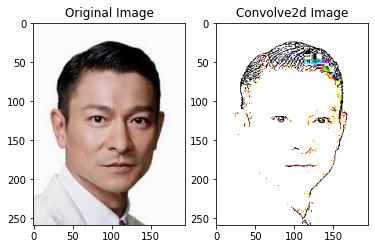

In [4]:
# Reference
img_sharpened = np.ones(img.shape)
for i in range(3): # 3 : RGB # [..., 0]
    img_sharpened[...,i] = np.clip(signal.convolve2d(img[...,i], 
                                                     kernel, 
                                                     mode='same', 
                                                     boundary="fill"), 0, 1)
print(img_sharpened.dtype, img_sharpened.min(), img_sharpened.max())
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(6, 6))
ax[0].imshow(img)
ax[0].set_title('Original Image', size=12)
ax[1].imshow(img_sharpened)
ax[1].set_title('Convolve2d Image', size=12)
plt.show()

In [ ]:
#################################
# 怎樣處理 RGB 
#################################

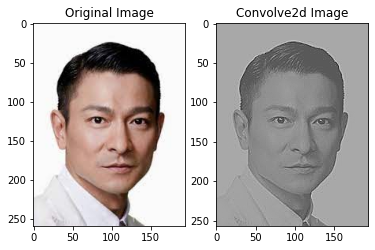

In [5]:
kernel = np.array([[0 , -1, 0], 
                   [-1,  5, -1], 
                   [0 , -1, 0]])
from skimage import color
andy_gray = color.rgb2gray(img)  # 這裡是黑白!!!

height, width = andy_gray.shape[0]-3+1, andy_gray.shape[1]-3+1
conv = np.zeros((height, width))
for ii in range(height):
    for jj in range(width):
        val = np.sum(kernel * andy_gray[ii:ii+3, jj:jj+3])
        conv[ii, jj] = val


fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(6, 6))
ax[0].imshow(img)
ax[0].set_title('Original Image', size=12)
ax[1].imshow(conv, cmap='gray')
ax[1].set_title('Convolve2d Image', size=12)
plt.show()

-282.0 530.0
0.0 1.0


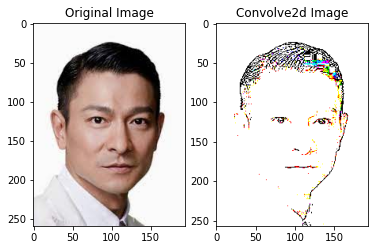

In [6]:
kernel = np.array([[0, -1, 0], 
                   [-1, 5, -1], 
                   [0, -1, 0]])
from skimage import color

height, width = img.shape[0]-3+1, img.shape[1]-3+1

conv = np.zeros((height, width, 3))
for rgb in range(3):
    for ii in range(height):
        for jj in range(width):
            img_flatten = img[..., rgb].reshape(img.shape[0], img.shape[1]) # 每一層RGB 三階tensor(height, width, rgb)->2-rank            
            val = np.sum(kernel * img_flatten[ii:ii+3, jj:jj+3])
            conv[ii, jj, rgb] = val

print(conv.min(), conv.max())
print(np.clip(conv, 0, 1).min(), np.clip(conv, 0, 1).max())

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(6, 6))
ax[0].imshow(img)
ax[0].set_title('Original Image', size=12)
ax[1].imshow( np.clip(conv, 0, 1) )
ax[1].set_title('Convolve2d Image', size=12)
plt.show()

In [ ]:
# 考慮使用 min - max : standardize 

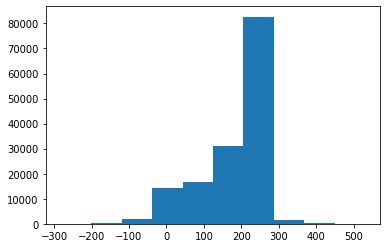

In [7]:
plt.hist(conv.flatten())
plt.show()

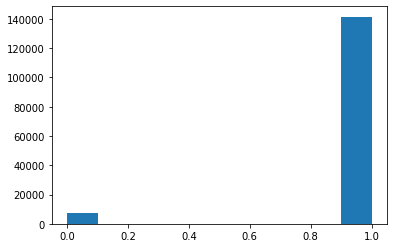

In [8]:
plt.hist(np.clip(conv, 0, 1).flatten())
plt.show()